In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

Este trabalho explora os princípios básicos da codificação de vídeo. Neste trabalho pretende-se implementar três formas de codificação de vídeo. Cada um destes codificadores deve ser testado com as sequências de imagens disponibilizadas (bola_seq.zip e carro_seq.zip). Para cada codificador deve medir (frame a frame):

##### 1. A taxa de compressão

In [4]:
def TaxaDeCompressao(original, comprimida):
    
    return original.nbytes / len(comprimida)

##### 2. A relação sinal-ruído (relação entre a frame original no emissor e a frame final no recetor)

In [17]:
def RelacaoSinalRuido(original, final):
    
    potenciaRuido = np.sum((final - original) ** 2)
    
    return np.sum(original ** 2) / potenciaRuido

##### 3. A entropia da frame a transmitir

In [6]:
def Entropia(frame):
    
    #plt.hist(frame, 256, [0,256])
    histogram, bins, patches = plt.hist(frame, 256, [0, 256])
    
    unique_symbols = np.unique(frame)
    
    # Filtrar os 0's
    H = [ps_i for ps_i in histogram if ps_i > 0]
    
    # Normalizar com o tamanho do sinal
    H = [ps_i/len(frame) for ps_i in H]

    # Calcular a entropia
    H = np.sum([ps_i * np.log2(1.0/ps_i) for ps_i in H])
    
    return H

##### 4. A energia média por pixel da frame a transmitir

In [7]:
def EnergiaMediaPorPixel(frame):
    
    return np.sum(frame ** 2) / len(frame)

##### 5. O tempo de compressão e descompressão

In [8]:
def TempoDeCompressaoEDescompressao(tempoInicial, tempoFinal):
    
    return tempoFinal - tempoInicial

No final deve construir gráficos ou tabelas que ilustrem estas medidas em função da frame.
<br>
<br>
Para os três codificadores use o algoritmo JPEG do OpenCV com uma qualidade de 50%.
As três formas de codificação são:

In [12]:
'''
Carregar a primeira imagem para arranjar o seu shape.
Criar o np.array para armazenar cada imagem (número de frames, comprimento, largura, canais)
Carregar as imagens seguidas e armazená-las nos arrays
'''

bolaShape = cv2.imread("bola_1.tiff").shape
carroShape = cv2.imread("carro_1.tiff").shape

bola = np.zeros((11, bolaShape[0], bolaShape[1], bolaShape[2]), dtype=np.uint8)
carro = np.zeros((11, carroShape[0], carroShape[1], carroShape[2]), dtype=np.uint8)

for index in range(11):
    bola[index] = cv2.imread("bola_{0}.tiff".format(index + 1))
    carro[index] = cv2.imread("carro_{0}.tiff".format(index + 1))

### 1. Considerar que cada frame é uma intra-frame (I).

Bola Frame 1
Taxa de Compressao: 2.4182744604110606
Relação Sinal Ruído: inf
Entropia: 7.919078966588461
Energia Media Por Pixel: 100.92417129444095
Tempo de Compressao: 0.005984783172607422
Tempo de Descompressao: 0.0019941329956054688

Carro Frame 1
Taxa de Compressao: 3.4236756869710585
Relação Sinal Ruído: inf


<ipython-input-17-6ae4f51e7881>:5: RuntimeWarning: divide by zero encountered in ulong_scalars
  return np.sum(original ** 2) / potenciaRuido


Entropia: 7.976211516150719
Energia Media Por Pixel: 104.2111238811688
Tempo de Compressao: 0.0029921531677246094
Tempo de Descompressao: 0.002992391586303711

Bola Frame 2
Taxa de Compressao: 2.414956263221085
Relação Sinal Ruído: inf
Entropia: 7.914464849889784
Energia Media Por Pixel: 100.99837059058945
Tempo de Compressao: 0.0040247440338134766
Tempo de Descompressao: 0.00099945068359375

Carro Frame 2
Taxa de Compressao: 3.376751854905194
Relação Sinal Ruído: inf
Entropia: 7.974440166516209
Energia Media Por Pixel: 105.22973344325364
Tempo de Compressao: 0.002990245819091797
Tempo de Descompressao: 0.0009992122650146484

Bola Frame 3
Taxa de Compressao: 2.4147721859100177
Relação Sinal Ruído: inf
Entropia: 7.914842181778283
Energia Media Por Pixel: 101.12975208186444
Tempo de Compressao: 0.004992246627807617
Tempo de Descompressao: 0.0019881725311279297

Carro Frame 3
Taxa de Compressao: 3.2940388030693963
Relação Sinal Ruído: inf
Entropia: 7.971728635331831
Energia Media Por Pixe

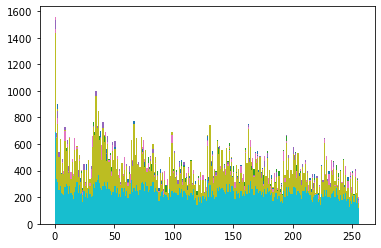

In [18]:
factorQualidade = 50

for index in range(1, 11):
    
    #Bola
    tempoInicialBola = time.time()
    bolaFrameComprimida = cv2.imencode('.tiff', bola[index], [int(cv2.IMWRITE_JPEG_QUALITY), factorQualidade])[1]
    tempoAposCompressaoBola = time.time()
    bolaFrameDescomprimida = cv2.imdecode(bolaFrameComprimida, cv2.IMREAD_COLOR)
    tempoAposDescompressaoBola = time.time()
    
    #Carro
    tempoInicialCarro = time.time()
    carroFrameComprimida = cv2.imencode('.tiff', carro[index], [int(cv2.IMWRITE_JPEG_QUALITY), factorQualidade])[1]
    tempoAposCompressaoCarro = time.time()
    carroFrameDescomprimida = cv2.imdecode(carroFrameComprimida, cv2.IMREAD_COLOR)
    tempoAposDescompressaoCarro = time.time()
    
    #Methods
    print("Bola Frame {0}".format(index))
    print("Taxa de Compressao: {0}".format(TaxaDeCompressao(bola[index], bolaFrameComprimida)))
    print("Relação Sinal Ruído: {0}".format(RelacaoSinalRuido(bola[index], bolaFrameDescomprimida)))
    print("Entropia: {0}".format(Entropia(bolaFrameComprimida)))
    print("Energia Media Por Pixel: {0}".format(EnergiaMediaPorPixel(bolaFrameComprimida)))
    print("Tempo de Compressao: {0}".format(TempoDeCompressaoEDescompressao(tempoInicialBola, tempoAposCompressaoBola)))
    print("Tempo de Descompressao: {0}".format(TempoDeCompressaoEDescompressao(tempoAposCompressaoBola, tempoAposDescompressaoBola)))
    print()
    
    print("Carro Frame {0}".format(index))
    print("Taxa de Compressao: {0}".format(TaxaDeCompressao(carro[index], carroFrameComprimida)))
    print("Relação Sinal Ruído: {0}".format(RelacaoSinalRuido(carro[index], carroFrameDescomprimida)))
    print("Entropia: {0}".format(Entropia(carroFrameComprimida)))
    print("Energia Media Por Pixel: {0}".format(EnergiaMediaPorPixel(carroFrameComprimida)))
    print("Tempo de Compressao: {0}".format(TempoDeCompressaoEDescompressao(tempoInicialCarro, tempoAposCompressaoCarro)))
    print("Tempo de Descompressao: {0}".format(TempoDeCompressaoEDescompressao(tempoAposCompressaoCarro, tempoAposDescompressaoCarro)))
    print()

### 2. Considerar que todas as frames à exceção da primeira (a I-frame) são inter-frames (P). Neste codificador deve criar as P-frames, que são a diferença entre a frame a codificar e a I-frame, sem compensação de movimento. <br> Visualize a P-frame (ou seja a imagem a transmitir).

Bola Frame 1
Taxa de Compressao: 3.2159171657699726
Relação Sinal Ruído: 1.0010372712930122
Entropia: 7.969802482072232
Energia Media Por Pixel: 103.88473251446554
Tempo de Compressao: 0.004984855651855469
Tempo de Descompressao: 0.001995563507080078

Carro Frame 1
Taxa de Compressao: 3.4236756869710585
Relação Sinal Ruído: inf


<ipython-input-17-6ae4f51e7881>:5: RuntimeWarning: divide by zero encountered in ulong_scalars
  return np.sum(original ** 2) / potenciaRuido


Entropia: 7.976211516150719
Energia Media Por Pixel: 104.2111238811688
Tempo de Compressao: 0.003989219665527344
Tempo de Descompressao: 0.001993894577026367

Bola Frame 2
Taxa de Compressao: 3.1836796221390347
Relação Sinal Ruído: 0.9967879649615494
Entropia: 7.968107036031656
Energia Media Por Pixel: 103.22509609828406
Tempo de Compressao: 0.004985809326171875
Tempo de Descompressao: 0.0009982585906982422

Carro Frame 2
Taxa de Compressao: 3.376751854905194
Relação Sinal Ruído: inf
Entropia: 7.974440166516209
Energia Media Por Pixel: 105.22973344325364
Tempo de Compressao: 0.0029935836791992188
Tempo de Descompressao: 0.0009927749633789062

Bola Frame 3
Taxa de Compressao: 2.706766917293233
Relação Sinal Ruído: 0.9935959977642064
Entropia: 7.945718859380972
Energia Media Por Pixel: 101.55875128161313
Tempo de Compressao: 0.006983280181884766
Tempo de Descompressao: 0.0020067691802978516

Carro Frame 3
Taxa de Compressao: 3.2940388030693963
Relação Sinal Ruído: inf
Entropia: 7.9717286

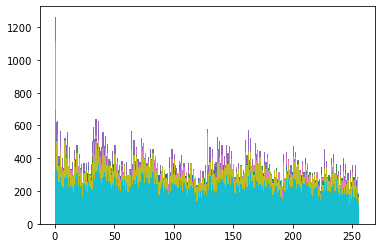

In [19]:
factorQualidade = 50

for index in range(1, 11):
    
    #Bola
    tempoInicialBola = time.time()
    bolaFrameP = bola[index] - bola[0]
    bolaFrameComprimida = cv2.imencode('.tiff', bolaFrameP, [int(cv2.IMWRITE_JPEG_QUALITY), factorQualidade])[1]
    tempoAposCompressaoBola = time.time()
    bolaFrameDescomprimida = cv2.imdecode(bolaFrameComprimida, cv2.IMREAD_COLOR)
    tempoAposDescompressaoBola = time.time()
    
    #Carro
    tempoInicialCarro = time.time()
    carroFrameP = carro[index] - carro[0]
    carroFrameComprimida = cv2.imencode('.tiff', carro[index], [int(cv2.IMWRITE_JPEG_QUALITY), factorQualidade])[1]
    tempoAposCompressaoCarro = time.time()
    carroFrameDescomprimida = cv2.imdecode(carroFrameComprimida, cv2.IMREAD_COLOR)
    tempoAposDescompressaoCarro = time.time()
    
    #Methods
    print("Bola Frame {0}".format(index))
    print("Taxa de Compressao: {0}".format(TaxaDeCompressao(bola[index], bolaFrameComprimida)))
    print("Relação Sinal Ruído: {0}".format(RelacaoSinalRuido(bola[index], bolaFrameDescomprimida)))
    print("Entropia: {0}".format(Entropia(bolaFrameComprimida)))
    print("Energia Media Por Pixel: {0}".format(EnergiaMediaPorPixel(bolaFrameComprimida)))
    print("Tempo de Compressao: {0}".format(TempoDeCompressaoEDescompressao(tempoInicialBola, tempoAposCompressaoBola)))
    print("Tempo de Descompressao: {0}".format(TempoDeCompressaoEDescompressao(tempoAposCompressaoBola, tempoAposDescompressaoBola)))
    print()
    
    print("Carro Frame {0}".format(index))
    print("Taxa de Compressao: {0}".format(TaxaDeCompressao(carro[index], carroFrameComprimida)))
    print("Relação Sinal Ruído: {0}".format(RelacaoSinalRuido(carro[index], carroFrameDescomprimida)))
    print("Entropia: {0}".format(Entropia(carroFrameComprimida)))
    print("Energia Media Por Pixel: {0}".format(EnergiaMediaPorPixel(carroFrameComprimida)))
    print("Tempo de Compressao: {0}".format(TempoDeCompressaoEDescompressao(tempoInicialCarro, tempoAposCompressaoCarro)))
    print("Tempo de Descompressao: {0}".format(TempoDeCompressaoEDescompressao(tempoAposCompressaoCarro, tempoAposDescompressaoCarro)))
    print()

### 3. Considerar que todas as frames à exceção da primeira são inter-frames (P). Neste codificador deve implementar a predição da frame a codificar com base na I-frame fazendo a compensação de movimento. A frame a transmitir é a diferença entre a frame a codificar e a sua predição. Sugere-se a construção de três funções:

##### 3.1. uma função que realiza a medição do erro absoluto médio entre dois blocos (tamanho 16 × 16)

In [10]:
def erroAbsolutoMedio(bloco, blocoOriginal):
    
    #A ideia é obter a diferença entre o bloco passado e o original.
    #Essa diferença tem de ser positiva (absoluto)
    #Somamos todos os valores e dividimos pelo número de pixeis (média)
    return np.sum(np.abs(bloco - blocoOriginal)) / len(bloco)

##### 3.2. uma função que realiza uma pesquisa (pode escolher a full-search ou outra) do macro-bloco da frame a codificar numa janela de pesquisa (-15 a +15) da I-frame

In [11]:
def full_search(IFrameOriginal, PFrameOriginal):
    
    IFrame = cv2.cvtColor(IFrameOriginal, cv2.COLOR_BGR2GRAY)
    PFrame = cv2.cvtColor(PFrameOriginal, cv2.COLOR_BGR2GRAY)
    
    EAM = 1000000000
    frameDescoberta = np.zeros((IFrameOriginal.shape[0], IFrameOriginal.shape[1]))
    
    comprimento = int(IFrame.shape[0] / 16)
    largura = int(IFrame.shape[1] / 16)
    
    for blocoHorizontalFrameP in range(comprimento):
        for blocoVerticalFrameP in range(largura):
            
            blocoFrameP = np.zeros((16, 16))
            blocoFrameP = PFrame[blocoHorizontalFrameP * 16 : blocoHorizontalFrameP * 16 + 16, blocoVerticalFrameP * 16 : blocoVerticalFrameP * 16 + 16]
        
            for blocoHorizontalProcura in range(-15, 16):
                for blocoVerticalProcura in range(-15, 16):
                    
                    blocoHorizontalProcuraAuxiliar = blocoHorizontalProcura
                    blocoVerticalProcuraAuxiliar = blocoVerticalProcura
                    
                    if blocoHorizontalProcura < 0:
                        blocoHorizontalProcuraAuxiliar = 0
                    if blocoHorizontalFrameP * 16 + 16 + blocoHorizontalProcura >= IFrame.shape[0]:
                        blocoHorizontalProcuraAuxiliar = 0
                    
                    if blocoVerticalProcura < 0:
                        blocoVerticalProcuraAuxiliar = 0
                    if blocoVerticalFrameP * 16 + 16 + blocoVerticalProcura >= IFrame.shape[1]:
                        blocoVerticalProcuraAuxiliar = 0
                    
                    blocoProcura = IFrame[blocoHorizontalFrameP * 16 + blocoHorizontalProcuraAuxiliar : blocoHorizontalFrameP * 16 + 16 + blocoHorizontalProcuraAuxiliar, blocoVerticalFrameP * 16 + blocoVerticalProcuraAuxiliar : blocoVerticalFrameP * 16 + 16 + blocoVerticalProcuraAuxiliar]
                    
                    EAMBloco = erroAbsolutoMedio(blocoProcura, blocoFrameP)
                
                    if EAMBloco < EAM:
                        EAM = EAMBloco
                        
            frameDescoberta[blocoHorizontalFrameP * 16 : blocoHorizontalFrameP * 16 + 16, blocoVerticalFrameP * 16 : blocoVerticalFrameP * 16 + 16] = blocoProcura
            EAM = 1000000000
            
    return frameDescoberta

##### 3.3. uma função que percorra os blocos da frame a codificar e construa a frame predita

In [12]:
#Esta função é realizada acima.

Visualizar a frame predita, e a frame diferença, bem como os vetores de movimento (use a função pylab.quiver
para o efeito).

In [ ]:
framePredita1 = full_search(bola[0], bola[1])

for index in range(1, len(bola)):
    
    tempoInicialBola = time.time()
    bolaFrameP = full_search(bola[0], bola[index])
    bolaFrameComprimida = cv2.imencode('.tiff', bolaFrameP, [int(cv2.IMWRITE_JPEG_QUALITY), factorQualidade])[1]
    tempoAposCompressaoBola = time.time()
    bolaFrameDescomprimida = cv2.imdecode(bolaFrameComprimida, cv2.IMREAD_COLOR)
    tempoAposDescompressaoBola = time.time()
    
    print("Bola Frame {0}".format(index))
    print("Taxa de Compressao: {0}".format(TaxaDeCompressao(bola[index], bolaFrameComprimida)))
    print("Relação Sinal Ruído: {0}".format(RelacaoSinalRuido(bola[index], bolaFrameDescomprimida)))
    print("Entropia: {0}".format(Entropia(bolaFrameComprimida)))
    print("Energia Media Por Pixel: {0}".format(EnergiaMediaPorPixel(bolaFrameComprimida)))
    print("Tempo de Compressao: {0}".format(TempoDeCompressaoEDescompressao(tempoInicialBola, tempoAposCompressaoBola)))
    print("Tempo de Descompressao: {0}".format(TempoDeCompressaoEDescompressao(tempoAposCompressaoBola, tempoAposDescompressaoBola)))
    print()
    
    #X, Y = np.meshgrid(framePredita1[0], framePredita1[0])
    #plt.quiver(X, Y, framePredita1[0],framePredita1[1])